In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.listdir(r"C:\Users\hp\Downloads\India")


['10_Property_stolen_and_recovered.csv',
 '20_Victims_of_rape.csv',
 '25_Complaints_against_police.csv',
 '28_Trial_of_violent_crimes_by_courts.csv',
 '29_Period_of_trials_by_courts.csv',
 '30_Auto_theft.csv',
 '31_Serious_fraud.csv',
 '32_Murder_victim_age_sex.csv',
 '33_CH_not_murder_victim_age_sex.csv',
 '35_Human_rights_violation_by_police.csv',
 '36_Police_housing.csv',
 '39_Specific_purpose_of_kidnapping_and_abduction.csv',
 '40_01_Custodial_death_person_remanded.csv',
 '40_02_Custodial_death_person_not_remanded.csv',
 '40_03_Custodial_death_during_production.csv',
 '40_04_Custodial_death_during_hospitalization_or_treatment.csv',
 '40_05_Custodial_death_others.csv',
 '42_Cases_under_crime_against_women.csv',
 '43_Arrests_under_crime_against_women.csv']

In [18]:
murder_victim = pd.read_csv(r"C:\Users\hp\Downloads\India/32_Murder_victim_age_sex.csv")
murder_victim.shape

type(murder_victim)

murder_victim_duplicated = murder_victim.duplicated().sum()
print(murder_victim_duplicated)

murder_victim.isnull().sum()

0


Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

                Group_Name  Victims_Total
0  Murder - Female Victims          81580
1    Murder - Male Victims         266274
2   Murder - Total Victims         347854
Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Victims_Above_50_Yrs', 'Victims_Total', 'Victims_Upto_10_15_Yrs',
       'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
       'Victims_Upto_18_30_Yrs', 'Victims_Upto_30_50_Yrs', 'victim_by_male',
       'victim_by_female'],
      dtype='object')


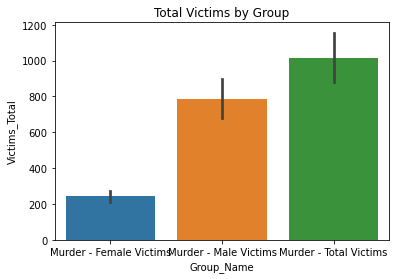

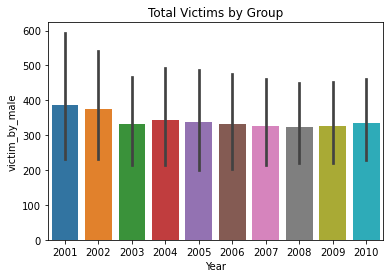

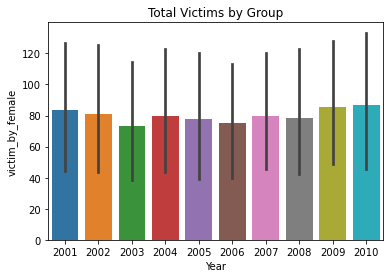

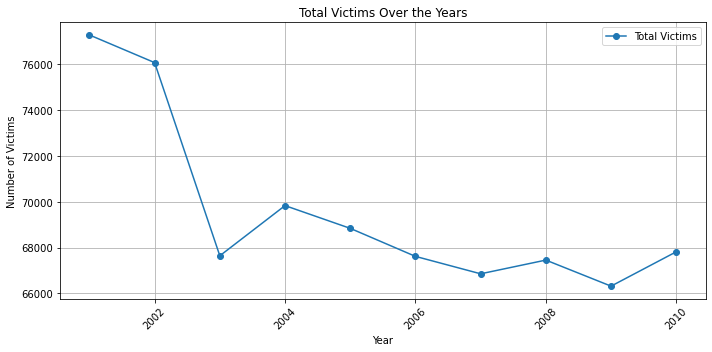

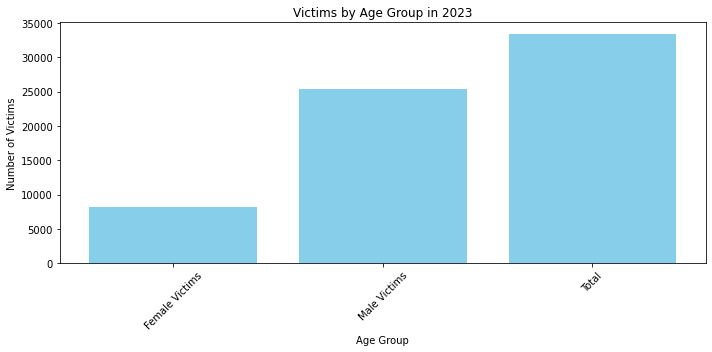

<Figure size 864x432 with 0 Axes>

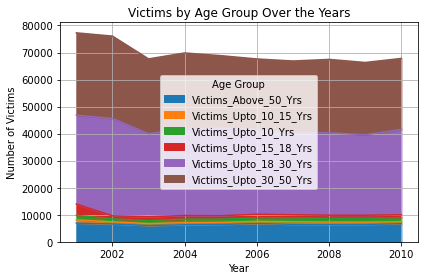

   Sub_Group_Name  Victims_Total
0  Female Victims           5500
1    Male Victims          11376
2           Total          16876


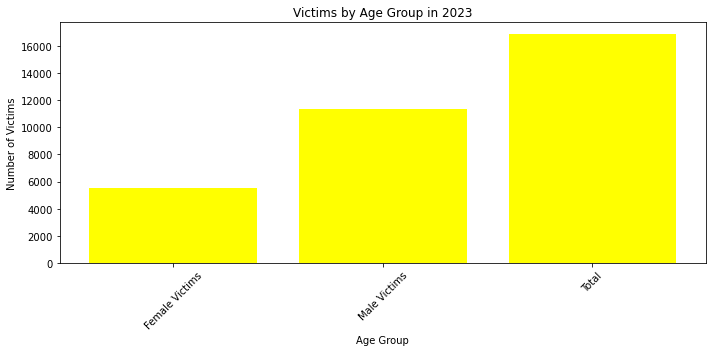

In [78]:
murder_victim['Sub_Group_Name'] = murder_victim['Sub_Group_Name'].str.replace(r'^\d+\.\s*', '', regex=True)
murder_victim

# print(murder_victim.describe())

victims_by_group = murder_victim.groupby('Group_Name')['Victims_Total'].sum().reset_index()
print(victims_by_group)

murder_victim['victim_by_male'] = murder_victim['Victims_Total'].where(murder_victim['Sub_Group_Name'].str.contains('Male Victims', case=False), 0)

murder_victim['victim_by_female'] = murder_victim['Victims_Total'].where(murder_victim['Sub_Group_Name'].str.contains('Female Victims', case=False), 0)

print(murder_victim.columns)

sns.barplot(x='Group_Name', y='Victims_Total', data=murder_victim)
plt.title('Total Victims by Group')
plt.show()

sns.barplot(x='Year', y='victim_by_male', data=murder_victim)
plt.title('Total Victims by Group')
plt.show()

sns.barplot(x='Year', y='victim_by_female', data=murder_victim)
plt.title('Total Victims by Group')
plt.show()


yearly_victims = murder_victim.groupby('Year')['Victims_Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_victims['Year'], yearly_victims['Victims_Total'], marker='o', label='Total Victims')
plt.title('Total Victims Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

age_groups = murder_victim[murder_victim['Year'] == 2007].groupby('Sub_Group_Name')['Victims_Total'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(age_groups['Sub_Group_Name'], age_groups['Victims_Total'], color='skyblue')
plt.title('Victims by Age Group in 2023')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pivot_df = murder_victim.pivot_table(index='Year', 
                           values=['Victims_Upto_10_Yrs', 'Victims_Upto_10_15_Yrs', 
                                   'Victims_Upto_15_18_Yrs', 'Victims_Upto_18_30_Yrs', 
                                   'Victims_Upto_30_50_Yrs', 'Victims_Above_50_Yrs'], 
                           aggfunc='sum')

plt.figure(figsize=(12, 6))
pivot_df.plot(kind='area', stacked=True)
plt.title('Victims by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

tamil_nadu_murder = murder_victim[murder_victim['Area_Name'] == "Tamil Nadu"].groupby('Sub_Group_Name')['Victims_Total'].sum().reset_index()
print(tamil_nadu_murder)

plt.figure(figsize=(10, 5))
plt.bar(tamil_nadu_murder['Sub_Group_Name'], tamil_nadu_murder['Victims_Total'], color='Yellow')
plt.title('Victims by Age Group in 2023')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

